# Random Forest
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)

### Ejercicio: Comparar el desempeño entre un árbol de decisión, un random forest y un clasificador adaboost

#### Leyendo los datos (Data set abalone)

In [5]:
nombres = ['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings']

In [6]:
abalone = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=nombres)

In [7]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Preprocesamiento de los datos

In [8]:
X = abalone.iloc[:,1:]

In [9]:
y = abalone.iloc[:,0:1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101893)

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
y_train = np.array(y_train)

In [15]:
y_test = np.array(y_test)

### Decision Tree

In [16]:
tree = DecisionTreeClassifier(max_features="auto")

In [17]:
tree.fit(X_train, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
tree_predict = tree.predict(X_test)

### Random Forest

In [19]:
forest = RandomForestClassifier(max_features="auto", n_estimators=100)

In [20]:
forest.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
forest_predict = forest.predict(X_test)

### Adaboost

In [22]:
adaboost = AdaBoostClassifier()

In [23]:
adaboost.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [24]:
adaboost_predict = adaboost.predict(X_test)

### Comparación de los desempeños

### Accuracy

#### Árbol de Decisión

In [25]:
accuracy_score(y_test, tree_predict)

0.48325358851674644

#### Random Forest

In [26]:
accuracy_score(y_test, forest_predict)

0.53748006379585322

#### Adaboost

In [27]:
accuracy_score(y_test, adaboost_predict)

0.50956937799043067

### Matriz de Confusión

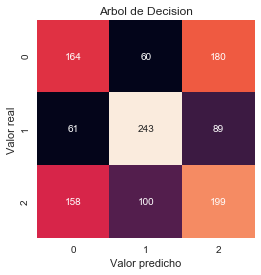

In [28]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
matriz_conf_tree = confusion_matrix(y_test, tree_predict)
sns.heatmap(matriz_conf_tree, square = True, annot = True, cbar = False, fmt='g')
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.title('Arbol de Decision')
plt.show()

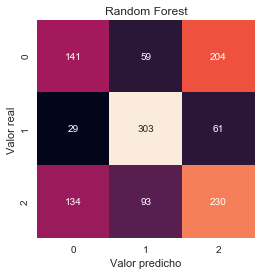

In [29]:
plt.close()
matriz_conf_forest = confusion_matrix(y_test, forest_predict)
sns.heatmap(matriz_conf_forest, square = True, annot = True, cbar = False, fmt='g')
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.title('Random Forest')
plt.show()

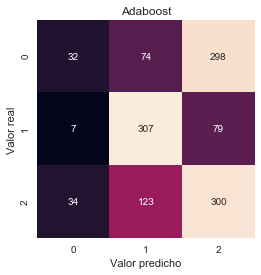

In [30]:
plt.close()
matriz_conf_adaboost = confusion_matrix(y_test, adaboost_predict)
sns.heatmap(matriz_conf_adaboost, square = True, annot = True, cbar = False, fmt='g')
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.title('Adaboost')
plt.show()

### Classification Report

#### Árbol de decisión

In [31]:
print(classification_report(y_test, tree_predict))

             precision    recall  f1-score   support

          F       0.43      0.41      0.42       404
          I       0.60      0.62      0.61       393
          M       0.43      0.44      0.43       457

avg / total       0.48      0.48      0.48      1254



#### Random Forest

In [32]:
print(classification_report(y_test, forest_predict))

             precision    recall  f1-score   support

          F       0.46      0.35      0.40       404
          I       0.67      0.77      0.71       393
          M       0.46      0.50      0.48       457

avg / total       0.53      0.54      0.53      1254



#### Adaboost

In [33]:
print(classification_report(y_test, adaboost_predict))

             precision    recall  f1-score   support

          F       0.44      0.08      0.13       404
          I       0.61      0.78      0.68       393
          M       0.44      0.66      0.53       457

avg / total       0.49      0.51      0.45      1254



### Conclusiones

Como podemos observar en las tres comparaciones, el modelo que mejor se desempeña es el Random Forest seguido por Adaboost, el árbol de decisión resulta ser el modelo con el desempeño más bajo.